In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
ls


MyDrive/  Shareddrives/


In [3]:
cd /gdrive/MyDrive/sport_classifier

/gdrive/MyDrive/sport_classifier


In [4]:
ls

images_dataset/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
img=cv2.imread('/content/drive/MyDrive/maria.jpg')
img.shape

(400, 400, 3)

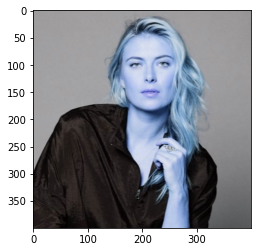

In [4]:
plt.imshow(img)

In [5]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(400, 400)

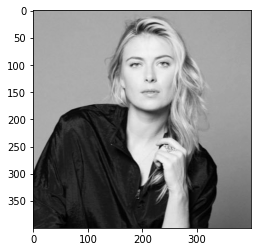

In [6]:
plt.imshow(gray , cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/sport/haarcascade_frontalface_default.xml')
eye_cascade= cv2.CascadeClassifier('/content/drive/MyDrive/sport/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[153,  49, 125, 125]], dtype=int32)

In [8]:
(x,y,w,h) =faces[0]
x,y,w,h

(153, 49, 125, 125)

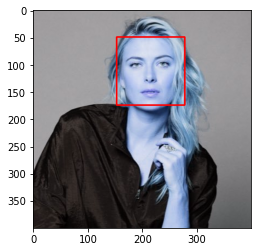

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

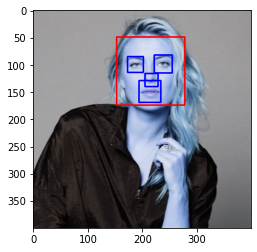

In [10]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
  face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray =  gray[y:y+h , x:x+w]
  roi_color = face_img[y:y+h , x:x+w]
  eyes=eye_cascade.detectMultiScale(roi_gray)
  for(ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)


plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

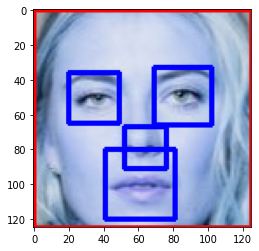

In [11]:
plt.imshow(roi_color,cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
  img=cv2.imread(image_path)
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces=face_cascade.detectMultiScale(gray,1.3,5)
  for(x,y,w,h) in faces:
     roi_gray =  gray[y:y+h , x:x+w]
     roi_color =  img[y:y+h , x:x+w]
     eyes=eye_cascade.detectMultiScale(roi_gray)
     if len(eyes) >=2:
       return roi_color

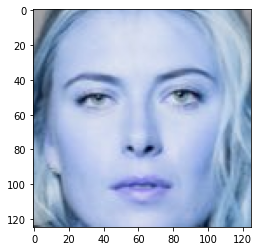

In [13]:
cropped_image = get_cropped_image_if_2_eyes('/content/drive/MyDrive/sport/maria.jpg')
plt.imshow(cropped_image)

In [14]:
path_to_data = '/content/drive/MyDrive/sport_classifier/images_dataset'
path_to_cr_data = '/content/drive/MyDrive/sport_classifier/images_dataset/cropped/'

In [15]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)

In [16]:
img_dirs

['/content/drive/MyDrive/sport_classifier/images_dataset/maria_sharapova',
 '/content/drive/MyDrive/sport_classifier/images_dataset/lionel_messi',
 '/content/drive/MyDrive/sport_classifier/images_dataset/virat_kohli',
 '/content/drive/MyDrive/sport_classifier/images_dataset/roger_federer',
 '/content/drive/MyDrive/sport_classifier/images_dataset/serena_williams']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
  shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)  

In [18]:
cropped_img_dirs=[]
celebrity_file_names_dict ={}

for img_dir in img_dirs:
  celebrity_name= img_dir.split('/')[-1]
  print(celebrity_name)

  celebrity_file_names_dict[celebrity_name]= []

  for entry in os.scandir(img_dir):
    count =1
    roi_color = get_cropped_image_if_2_eyes(entry.path)
    if roi_color is not None:
      cropped_folder = path_to_cr_data + celebrity_name
      if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
        cropped_img_dirs.append(cropped_folder)
        print("Generating cropped images in images" , cropped_folder )

      cropped_file_name= celebrity_name + str(count) + ".png"
      cropped_file_path = cropped_folder +"/" + cropped_file_name

      cv2.imwrite(cropped_file_path, roi_color)
      celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
      count+=1

maria_sharapova
Generating cropped images in images /content/drive/MyDrive/sport_classifier/images_dataset/cropped/maria_sharapova
lionel_messi
Generating cropped images in images /content/drive/MyDrive/sport_classifier/images_dataset/cropped/lionel_messi
virat_kohli
Generating cropped images in images /content/drive/MyDrive/sport_classifier/images_dataset/cropped/virat_kohli
roger_federer
Generating cropped images in images /content/drive/MyDrive/sport_classifier/images_dataset/cropped/roger_federer
serena_williams
Generating cropped images in images /content/drive/MyDrive/sport_classifier/images_dataset/cropped/serena_williams


In [19]:
import numpy as np
import pywt
import cv2

def w2d (img, mode ='haar', level=1):
  imArray = img

  imArray= cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY) 

  imArray = np.float32(imArray)
  imArray /= 255;

  coeffs=pywt.wavedec2(imArray,mode,level=level)

  coeffs_H=list(coeffs)
  coeffs_H[0]*=0;

  imArray_H=pywt.waverec2(coeffs_H,mode);
  imArray_H*=255;
  imArray_H= np.uint8(imArray_H)

  return imArray_H

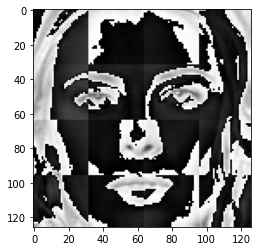

In [20]:
img_har = w2d(cropped_image,'db1',5)
plt.imshow(img_har,cmap='gray')

In [21]:
celebrity_file_names_dict 

{'lionel_messi': ['/content/drive/MyDrive/sport_classifier/images_dataset/cropped/lionel_messi/lionel_messi1.png',
  '/content/drive/MyDrive/sport_classifier/images_dataset/cropped/lionel_messi/lionel_messi1.png',
  '/content/drive/MyDrive/sport_classifier/images_dataset/cropped/lionel_messi/lionel_messi1.png',
  '/content/drive/MyDrive/sport_classifier/images_dataset/cropped/lionel_messi/lionel_messi1.png',
  '/content/drive/MyDrive/sport_classifier/images_dataset/cropped/lionel_messi/lionel_messi1.png',
  '/content/drive/MyDrive/sport_classifier/images_dataset/cropped/lionel_messi/lionel_messi1.png',
  '/content/drive/MyDrive/sport_classifier/images_dataset/cropped/lionel_messi/lionel_messi1.png',
  '/content/drive/MyDrive/sport_classifier/images_dataset/cropped/lionel_messi/lionel_messi1.png',
  '/content/drive/MyDrive/sport_classifier/images_dataset/cropped/lionel_messi/lionel_messi1.png',
  '/content/drive/MyDrive/sport_classifier/images_dataset/cropped/lionel_messi/lionel_messi1.

In [22]:
class_dict= {}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
  class_dict[celebrity_name]= count
  count = count +1
class_dict

{'lionel_messi': 1,
 'maria_sharapova': 0,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 2}

In [23]:
X,y = [],[]

for celebrity_name , training_files in celebrity_file_names_dict.items():
  for training_image in training_files:
    img=cv2.imread(training_image)
    if img is None:
      continue
    scalled_raw_img = cv2.resize(img,(32,32))
    img_har = w2d(img,'db1',5)
    scalled_img_har = cv2.resize(img_har,(32,32))
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    X.append(combined_img)
    y.append(class_dict[celebrity_name])

In [24]:
 X= np.array(X).reshape(len(X),4096).astype(float)
 X.shape

(187, 4096)

In [25]:
from sklearn.svm import  SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =0)

In [27]:
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'rbf',C=5))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

1.0

In [ ]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         9

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



In [ ]:
from sklearn import  svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [36]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [37]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,1.0,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
1,random_forest,1.0,{'randomforestclassifier__n_estimators': 1}
2,logistic_regression,1.0,{'logisticregression__C': 1}


In [38]:
best_estimators

{'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=1))]),
 'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, gamma='auto', probability=True))])}

In [39]:
best_estimators['svm'].score(X_test,y_test)

1.0

In [41]:
best_estimators['random_forest'].score(X_test,y_test)

1.0

In [40]:
best_estimators['logistic_regression'].score(X_test,y_test)

1.0

In [42]:
best_clf = best_estimators['svm']

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0],
       [ 0,  0, 12,  0,  0],
       [ 0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  9]])

Text(69.0, 0.5, 'Truth')

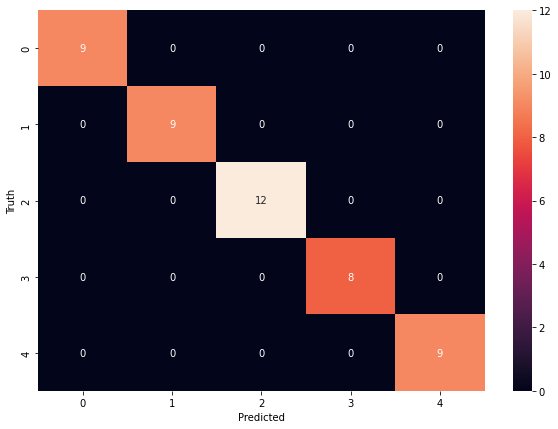

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
class_dict

{'.ipynb_checkpoints': 5,
 'cropped': 6,
 'lionel_messi': 1,
 'maria_sharapova': 0,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 2}

In [48]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'model_sports.pkl') 

['model_sports.pkl']

In [49]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))